# BINNED FLOW ZONE INDICATOR (FZI) CORRELATION TO WIRELINE LOGS:  A classification problem

### A Test Case: Manyberries, AB

Kevin Fossenier
April 22/2021

## THE PROBLEM


This notebook is part of a series of notebooks that will attempt to predict reservoir quality using the FZI parameter.  Details of the problem are provided in the regression problem notebook and the report document associated with these files.  The regression model did not provide a good enough prediction for deployment.  The initial FZI values were binned qualitatively (1 to 6; see input description below for details).  Values (i.e. porosity and permeability) used in the calculation of FZI can be be prone to analytical error and sampling is not done at the same rate as wireline logs.  Binning may help smooth out the interpretation and assist in providing a more generalized model.


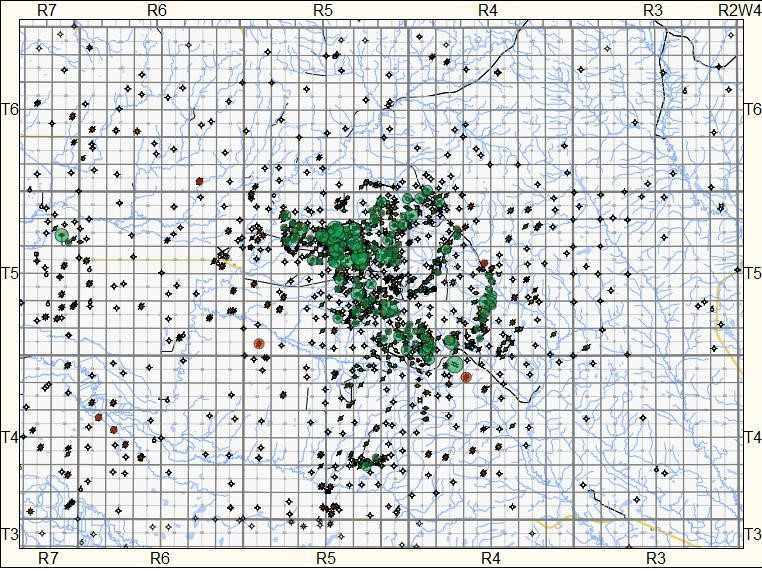

Figure 1:  Manyberries, AB, study area map for.  Green bubbles are oil production for that pool

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
well = pd.read_csv("100042700505W400WR.csv", header=0, skiprows=[1])

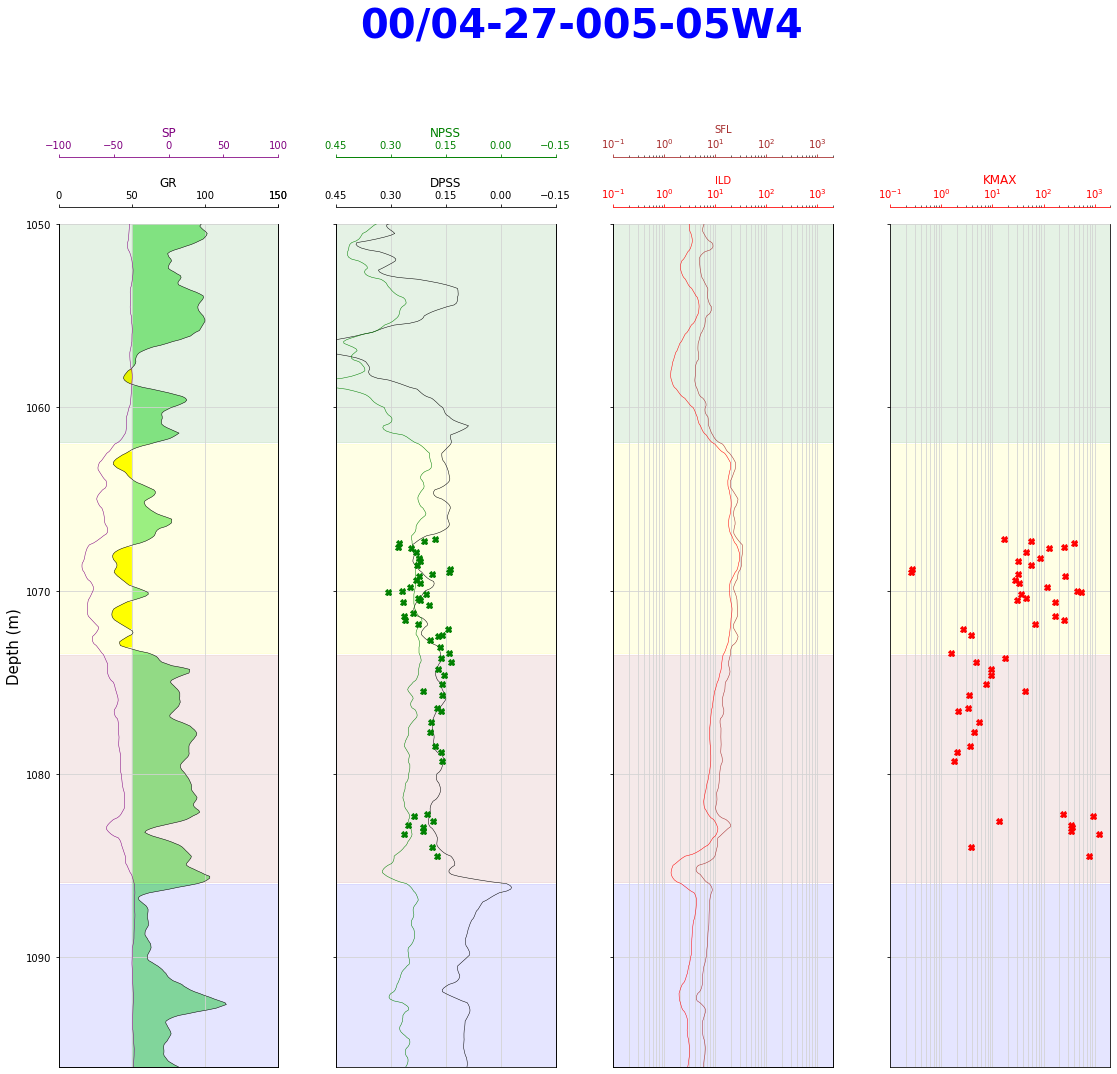

In [2]:
# Create a dictionary of formations with a top and bottom depth
formations = {"MNVL":[1050, 1061.9,], 
              "SBRS": [1062, 1073.4],
              "SWFT": [1073.5, 1085.9],
              "RRDN": [1086, 1096],}
              

# Select the same number of colours as there are formations
zone_colours = ["green", "yellow", "brown", "blue"]
              
fig, ax = plt.subplots(figsize=(20,50))

#Set up the plot axes
ax1 = plt.subplot2grid((4,5), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((4,5), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((4,5), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((4,5), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax1.twiny()
ax6 = ax2.twiny()
ax7 = ax3.twiny()

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "black", linewidth = 0.5)
ax1.set_xlabel("GR",fontsize = 12)
ax1.xaxis.label.set_color("black")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (m)", fontsize=15)
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.title.set_color('black')#assign title color
ax1.fill_betweenx(well["DEPTH"],well["GR"], 50, where = (well["GR"]<=50),facecolor='yellow')# this defines <50 Gr Api cutoff
ax1.fill_betweenx(well["DEPTH"],well["GR"], 50, where = (well["GR"]>=50),facecolor='lightgreen')# this defines >50 Gr Api cutoff
ax1.set_xticks([0, 50, 100, 150, 150])#assign x ticks with values

# Density track
ax2.plot("DPSS", "DEPTH", data = well, color = "black", linewidth = 0.5)
ax2.set_xlabel("DPSS",fontsize = 12)
ax2.set_xlim(.45,-.15)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("black")
ax2.set_xticks([.45, .30, .15, 0,-.15])#assign x ticks with values

# Resistivity track
ax3.plot("ILD", "DEPTH", data = well, color = "red", linewidth = 0.5)
ax3.set_xlabel("ILD",fontsize = 10)
ax3.set_xlim(0.2, 2000)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([0.1, 1, 10, 100, 1000])
ax3.semilogx()#log scale 

# Permeability track
ax4.plot("KMAX", "DEPTH", data = well, color = "red", linewidth = 0, marker= 'X')
ax4.set_xlabel("KMAX",fontsize = 12)
ax4.set_xlim(0.2, 2000)
ax4.xaxis.label.set_color("red")
ax4.tick_params(axis='x', colors="red")
ax4.spines["top"].set_edgecolor("red")
ax4.set_xticks([0.1, 1, 10, 100, 1000])
ax4.semilogx()#log scale 


# SP track placed ontop of density track
ax5.plot("SP", "DEPTH", data = well, color = "purple", linewidth = 0.5)
ax5.set_xlabel('SP',fontsize = 12)
ax5.xaxis.label.set_color("purple")
ax5.set_xlim(-100, 100)
ax5.tick_params(axis='x', colors="purple")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("purple")
ax5.set_xticks([-100,-50,0,50,100])

# COREPHI track placed ontop of density track
ax6.plot("COREPHI", "DEPTH", data = well, color = "green", marker= 'X', linewidth = 0)
ax6.set_xlabel('COREPHI',fontsize = 12)
ax6.xaxis.label.set_color("green")
ax6.set_xlim(0.45, -0.15)
ax6.tick_params(axis='x', colors="green")
ax6.spines["bottom"].set_position(("axes", 1.08))
ax6.spines["bottom"].set_visible(True)
ax6.spines["bottom"].set_edgecolor("green")
ax6.set_xticks([0.45, .30, 0.15, 0, -0.15])

# Neutron track placed ontop of density track
ax6.plot("NPSS", "DEPTH", data = well, color = "green", linewidth = 0.5)
ax6.set_xlabel('NPSS',fontsize = 12)
ax6.xaxis.label.set_color("green")
ax6.set_xlim(0.45, -0.15)
ax6.tick_params(axis='x', colors="green")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.spines["top"].set_visible(True)
ax6.spines["top"].set_edgecolor("green")
ax6.set_xticks([0.45, .30, 0.15, 0, -0.15])

# Shallow focused resistivity on top of ild track
ax7.plot("SFL", "DEPTH", data = well, color = "brown", linewidth = 0.5)
ax7.set_xlabel("SFL",fontsize = 10)
ax7.set_xlim(0.2, 2000)
ax7.xaxis.label.set_color("brown")
ax7.tick_params(axis='x', colors="brown")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_edgecolor("brown")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()



# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1,ax2,ax3,ax4]:#defines which axis' are involved in the loop
    ax.set_ylim(1096, 1050)#assign depth limits
    ax.grid(which='major', color='lightgrey', linestyle='-')#assign grid color for major 
    ax.grid(which='minor', color='lightgrey', linestyle='-')#assign grid color for minor
    ax.xaxis.set_ticks_position("top")#assign tick position to top
    ax.xaxis.set_label_position("top")#assign tick label position to top
    ax.spines["top"].set_position(("axes", 1.02)) #assign label position at 1.02 above top
    
# loop through the formations dictionary and zone colours
    for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)# this line references the dictonary of formations
        
for ax in [ax2,ax3,ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)#shuts off depth tick labels 
    
plt.tight_layout(pad=3)# pad adjusts distance from figure edge to edges of subplots

fig.suptitle("00/04-27-005-05W4", x= .42, y= 1.03, fontsize=40, fontweight='bold', color='blue')

plt.savefig('04-27-5-5W5.pdf', bbox_inches='tight', dpi=150,) # saves plot to an output at a certain dpi resolution


Figure 2:  Wireline log for the Manyberries area (graphic representation from P. Stevenson)

## METHODOLOGY¶

### DATA ACQUISITION AND LOADING

The problem dataset was supplied by a colleague P. Stevenson (calculated FZI and binned) and that data was acquired from publicly available oil and gas repositories with the Alberta government.  Third party vendors collect this data and sell it to oil and gas companies.  


In [107]:
# import pandas, matplotlib, numpy and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [108]:
# import already wrangled dataframe from regression problem
df = pd.read_csv('Manyberries_FZI_bin_classification.csv', encoding='UTF-8')

# Note FZI was binned in another column, this data was removed prior 
# to loading and will be used in another prediction

### DATA OVERVIEW

In [109]:
# plot first (X) number of rows.  Default is 5 if unspecific
df.head()

,UWI,FM_TOP,DEPTH,GR,SP,CALX,RHOB,DPSS,NPSS,ILD,ILM,SFL,DT,Binned_FZI_PS
0,102081000505W400,LMNV,1112.1,46.32,-39.50,212.37,2378.71,0.17,0.31,4.24,4.24,5.89,NaN,4
1,102081000505W400,LMNV,1112.2,46.90,-42.00,212.85,2378.71,0.17,0.31,4.61,4.65,6.44,NaN,2
2,102081000505W400,LMNV,1112.6,55.67,-48.60,210.07,2405.00,0.14,0.36,6.26,6.38,7.16,NaN,5
3,102081000505W400,LMNV,1112.7,56.26,-50.40,206.31,2425.50,0.14,0.35,6.59,6.84,7.20,NaN,2
4,102081000505W400,SBRS,1115.2,56.96,-67.49,204.46,2312.50,0.23,0.25,14.71,19.37,19.28,NaN,4


In [110]:
# dataframe overview summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UWI            823 non-null    object 
 1   FM_TOP         823 non-null    object 
 2   DEPTH          823 non-null    float64
 3   GR             823 non-null    float64
 4   SP             823 non-null    float64
 5   CALX           802 non-null    float64
 6   RHOB           823 non-null    float64
 7   DPSS           823 non-null    float64
 8   NPSS           823 non-null    float64
 9   ILD            823 non-null    float64
 10  ILM            823 non-null    float64
 11  SFL            823 non-null    float64
 12  DT             558 non-null    float64
 13  Binned_FZI_PS  823 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 90.1+ KB


In [111]:
# shape attribute - dimension of array of dataframe
df.shape

(823, 14)

# Features of this dataframe include:

    1. UWI:  Unique Well Identifier.  The geographic location for a well using either the NTS or DLS survey system. 
    2. FM_TOP:  Name of the geologic formation at that depth
    3. DEPTH:  Depth of the measurement (metres)
    4. GR: Gamma Ray.  The bulk radioactivity of the formation at that depth.  
    5. SP: Spontaneous Potential.  A measure of natural potential difference between the wellbore and the surface.  The current flow created between the formation in the absence of applied current.
    6. CALX: Caliper measurement.  Measurement of the borehole in one axis (mm).
    7. RHOB:  Bulk Density.  The bulk density of the formation at that depth (g/cm3).  Measures the electron density of the rock.               
    8. DPSS: Density porosity base on a sandtone lithology being measured.  Calculated from RHOB, matrix density, density of drilling fluid and density of fluid in the reservoir.
    9. NPSS: Neutron porosity based on sandstone lithology.  Measures the hydrogen concentration in the reservoir by emitting neutrons that collide with nucleii in the formation.  Max loss occurs when neutron collides with hydrogen atom.    
    10. ILD:  Induction deep measurement (ohms).  Essentially measures the conductive or resisitive capacity of a rock by inducing an electrical field
    11. ILM: Industion medium depth measurement (ohms).  Same as ILD, but electrical field is smaller and depth of investigaton is smaller
    12. SFL: shallow focused lateralog (ohms). Same as ILD, but electrical field is the smallest of the three measurements
    13. DT: sonic interval travel time.  Measure of how fast or slow a sonic wave (compressional and shear) travels through the formation and back to the receiver.  Varies with lithology, porosity, fluid type, but primarily it is a measure of porosity.
    14. binned_FZI_PS: 'TARGET'.  Flow zone indicator binned with values between 1 and 6.  1 the poorest/smallest FZI and 6 is the best/highest FZI.
        Bins are:  1= <0.5
                   2= 0.5 to <1
                   3= 1 to <2
                   4= 2 to <4
                   5= 4 to <6
                   6= >6

### DATA WRANGLING

Since the dataset is essentially the same, the wrangling steps performed on the regression version of this problem will be performed here as well.  Some of the incremental steps/discussion will be skipped to expedite the modelling.

In [112]:
# check for missing values in each column and sum using pandas
df.isnull().sum()

# fill missing values with specified (X) value 
# df.fillna()
# no missing values in this dataset

UWI                0
FM_TOP             0
DEPTH              0
GR                 0
SP                 0
CALX              21
RHOB               0
DPSS               0
NPSS               0
ILD                0
ILM                0
SFL                0
DT               265
Binned_FZI_PS      0
dtype: int64

Same missing values as before and Binned_FZI_PS has no missing values.  

In [113]:
# delete rows with missing values
# replace missing values with median
df['CALX'] = df['CALX'].fillna(df['CALX'].median())

# delete column with too many missing values 
df = df.drop(columns = ['DT'])

# delete not necessary to the analysis.  Others will follow further analysis
df = df.drop(columns = ['UWI', 'FM_TOP', 'DEPTH'])

# delete input too corelated to another input 
# as established in regression problem that it helped the model
df = df.drop(columns = ['DPSS'])

# confirm change
df.head()

,GR,SP,CALX,RHOB,NPSS,ILD,ILM,SFL,Binned_FZI_PS
0,46.32,-39.50,212.37,2378.71,0.31,4.24,4.24,5.89,4
1,46.90,-42.00,212.85,2378.71,0.31,4.61,4.65,6.44,2
2,55.67,-48.60,210.07,2405.00,0.36,6.26,6.38,7.16,5
3,56.26,-50.40,206.31,2425.50,0.35,6.59,6.84,7.20,2
4,56.96,-67.49,204.46,2312.50,0.25,14.71,19.37,19.28,4


In [114]:
# save wrangled file for future use
df.to_csv(r'C:\Users\14038\jupyter_projects\Manyberries_FZI\FZI_binned_wrangle.csv', index=False)

### OUTLIER ANALYSIS

Box plots can now be visualized by the individual target classes.  These visualizations and the summary statistics noted below are useful to detecting outliers and gaining knowledge of the various distributions. The min and max are the noted by horizontal terminations of the lines and the diamond shapes are potential outliers beyond the min or max line. 

The box plots using sorting by the 'Binned FZI' values illustrates if the outliers are evenly distributed or more specific to certain bins.  GR, SP, CALX, ILD show a skewed distribution with outliers only present above the 75th percentile.  GR, SP, NPSS and ILD have outliers across all bin categories, whereas the other inputs are more specific to certain categories.  

In [115]:
# basic summary stats of dataframe and defined quartiles
df.describe()

,GR,SP,CALX,RHOB,NPSS,ILD,ILM,SFL,Binned_FZI_PS
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,56.478676,-36.158117,203.785899,2357.049295,0.284192,17.877412,18.812916,24.252770,3.068044
std,21.141645,40.049282,12.642993,79.898105,0.046944,12.761298,15.992650,30.484999,1.310722
min,16.650000,-108.420000,184.750000,1958.700000,0.090000,1.390000,1.530000,1.820000,1.000000
25%,42.455000,-63.160000,195.495000,2305.115000,0.260000,12.025000,12.145000,12.930000,2.000000
50%,53.470000,-44.950000,200.465000,2359.520000,0.280000,15.270000,15.710000,17.570000,3.000000
75%,66.700000,-19.700000,208.240000,2405.970000,0.310000,19.460000,19.820000,23.805000,4.000000
max,175.620000,82.700000,296.550000,2959.800000,0.530000,107.210000,167.790000,420.990000,6.000000


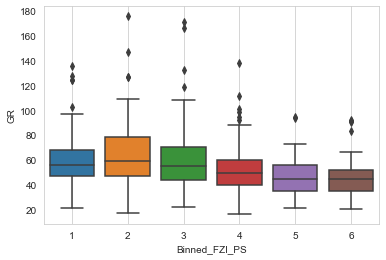

In [116]:
# box plot using seaborn for GR
sns.boxplot(x='Binned_FZI_PS',y='GR',data=df);
plt.grid()
plt.show()

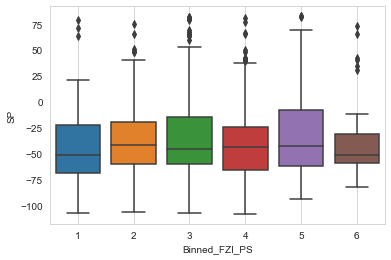

In [117]:
# box plot using seaborn for SP
sns.boxplot(x='Binned_FZI_PS',y='SP',data=df);
plt.grid()
plt.show()

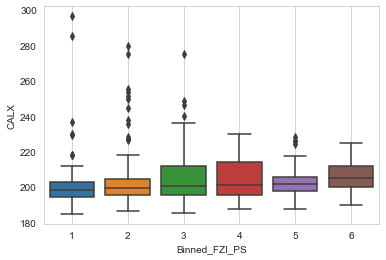

In [118]:
# box plot using seaborn for CALX
sns.boxplot(x='Binned_FZI_PS',y='CALX',data=df);plt.grid()
plt.show()

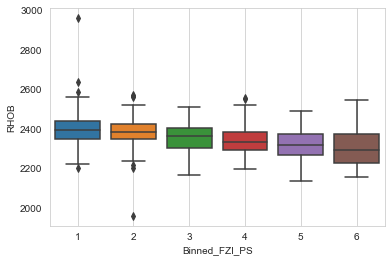

In [119]:
# box plot using seaborn for RHOB
sns.boxplot(x='Binned_FZI_PS',y='RHOB',data=df);
plt.grid()
plt.show()

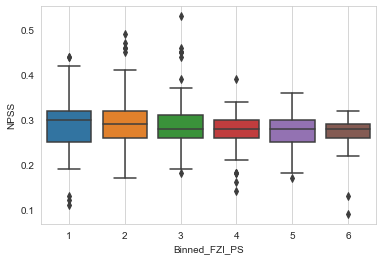

In [120]:
# box plot using seaborn for NPSS
sns.boxplot(x='Binned_FZI_PS',y='NPSS',data=df);
plt.grid()
plt.show()

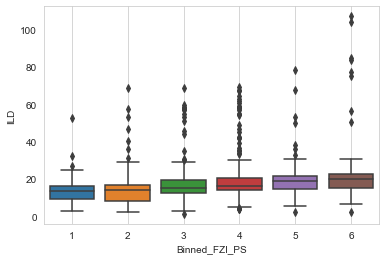

In [121]:
# box plot using seaborn for GR
sns.boxplot(x='Binned_FZI_PS',y='ILD',data=df);
plt.grid()
plt.show()

In [122]:
# skewness of data
df.skew()

GR               1.294231
SP               0.911826
CALX             2.297390
RHOB             0.379213
NPSS             0.466303
ILD              2.950419
ILM              4.190663
SFL              7.103572
Binned_FZI_PS    0.270496
dtype: float64

Skewed distributions are those above 1 or below -1.  GR, CALX and ILD are significantly skewed to the right (positive) and SP is moderately skewed.  All others appear to be relatively normally distributed.  

### BIVARIATE & UNIVARIATE ANALYSIS

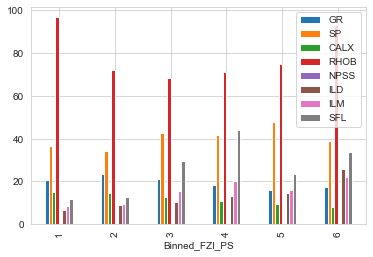

In [123]:
#plot standard deviation of corresponding species input variables
df.groupby('Binned_FZI_PS').std().plot.bar();

# mean and median were plotted, but omitted because they did not illustrate anything meaningful

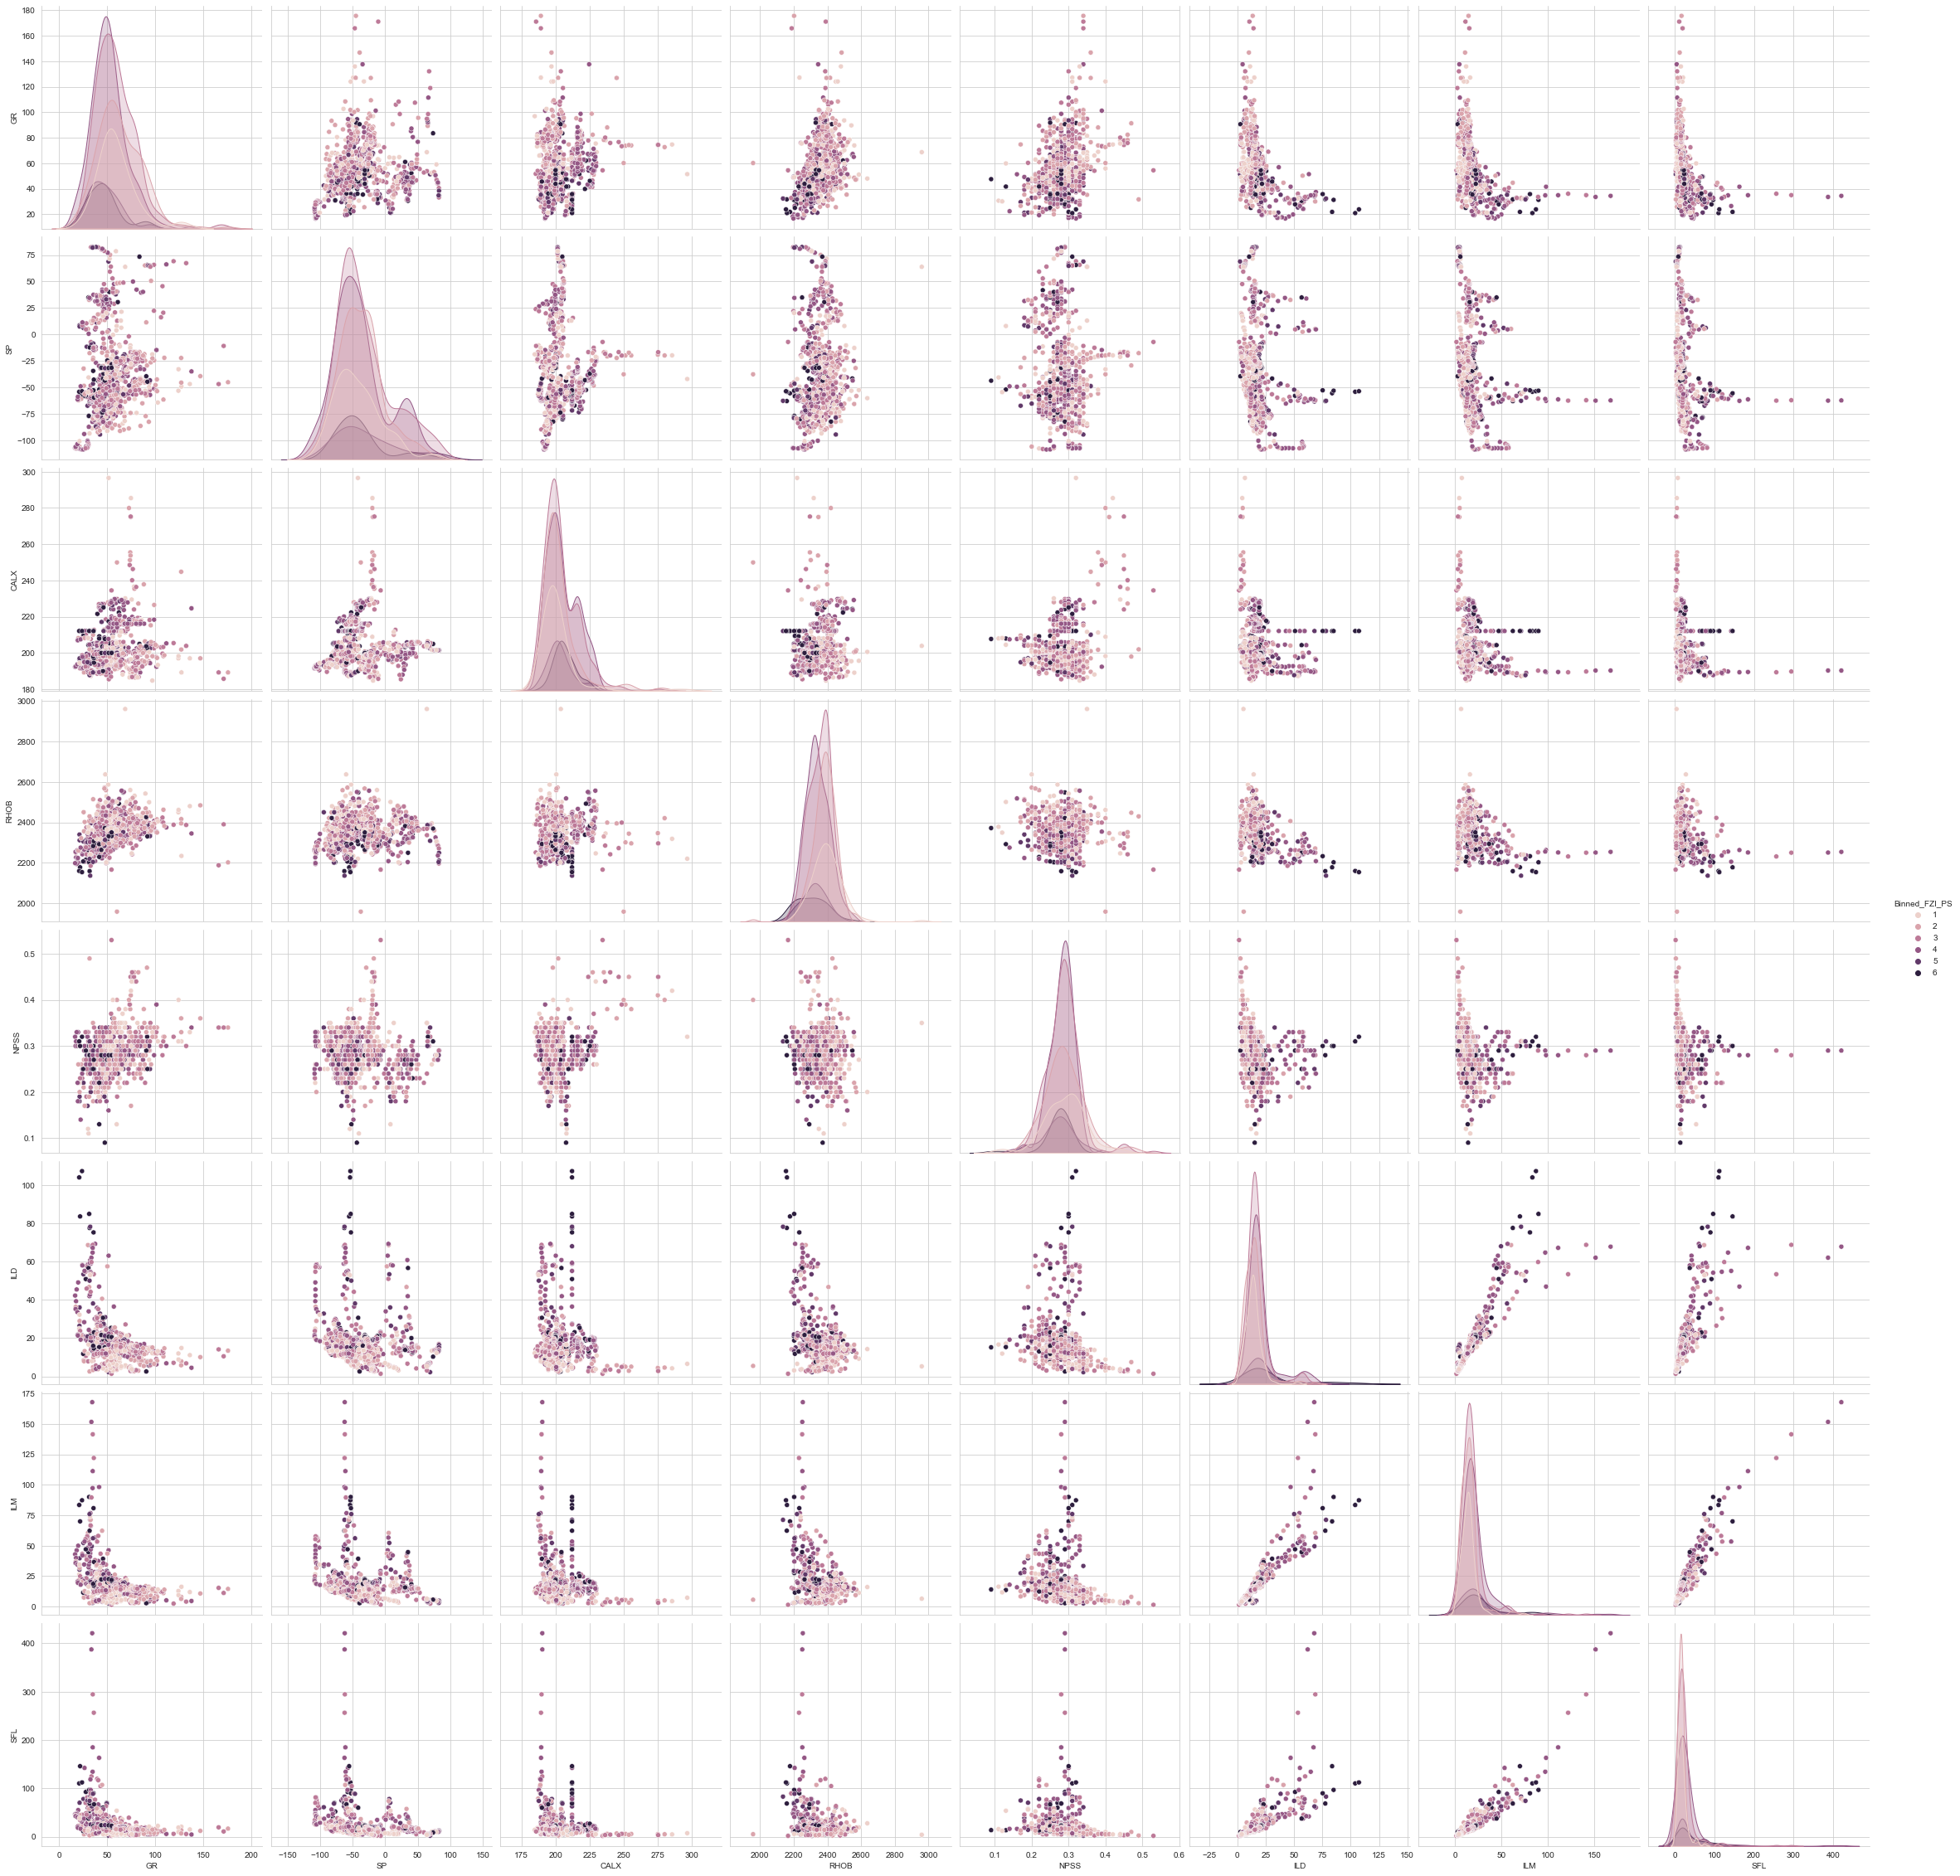

In [124]:
# a bivariate analysis (Pairplot) using seaborn
sns.set_style('whitegrid')
sns.pairplot(df,hue='Binned_FZI_PS',height=4)
plt.show()

Univariate distribution plots  (diagonal from upper left to lower right) do appear to be positively skewed to normally distributed.  Outlier removal likely would make most of the distributions normal.   Bivariate plots all exhibit could clustering, but a fair degree of scatter commonly associated with 'binned_fzi_ps' class #6.  

### CORRELATION

Correlation was analyzed in detail for the regression problem and will only be revisiting for the purposes of determining correlation to the new target, 'Binned_FZI_PS'


<AxesSubplot:>

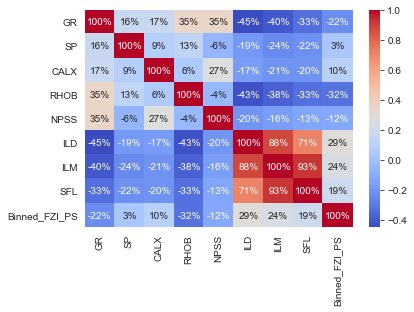

In [125]:
# annotated heatmap of above pearsons correlation
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='coolwarm')

No inputs correlate well to the target 'Binned_FZI_PS'.  For detailed correlation discussion see the FZI regression analysis notebook.


## MODEL BUILD & OUTPUT

### FEATURE PREPROCESSING

<AxesSubplot:xlabel='Binned_FZI_PS', ylabel='count'>

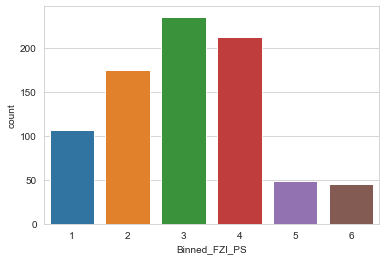

In [126]:
# Count number of each target class has occurred to assess data balance.
sns.set_style('whitegrid')
sns.countplot(x='Binned_FZI_PS', data=df)

The target classes are somewhat normally distributed and unfortunately the target classes not equal.  Given that class 5 and 6 represent the absolute highest FZI values (best reservoir) these are unsurprisingly less common.  As a possible solution to the imbalance, we will reduce the classes to 5 by combining class 5 and 6 together.

<AxesSubplot:xlabel='Binned_FZI_PS', ylabel='count'>

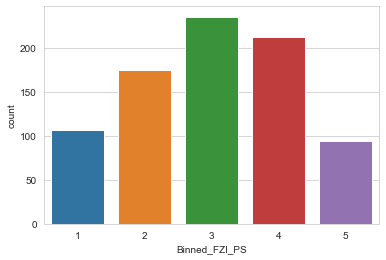

In [127]:
df['Binned_FZI_PS'] = df['Binned_FZI_PS'].replace([6],5)
sns.set_style('whitegrid')
sns.countplot(x='Binned_FZI_PS', data=df)

In [128]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
from sklearn.model_selection import train_test_split

In [129]:
# separate input (y) and target (x) variables
# create _train and _test dataset for model
x = df.drop(columns=['Binned_FZI_PS']) # input features
y = df['Binned_FZI_PS'] # target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

Input values have a wide range of values that need to be scaled.  The distributions range from normal to skewed and in many cases the skewed data is possibly normal with just outliers.   We will MinMax scaler as it is a bit more 'all purpose' and suitable for distributions that are not necessarily normal.  

In [130]:
# rescale data using scaler that handles non gaussian and outlier better
# scale values using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [131]:
x_train = minmax.fit_transform(x_train) # fit and transform
x_test = minmax.transform(x_test) # only transform the input data

We are going to follow the sklearn flow chart/cheat sheet for classficaton with a few additional of my favorite algorithms as extras.  These include: SVC, KNN, Logistic Regression and Random Forest Classifier. Algorithms  list as the results come in.

### MODEL RUN #1

In [132]:
# KNN (K nearest neighbors) model import and define as model
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier() 

# train the data using above KNN model
KNNmodel.fit(x_train, y_train)

KNeighborsClassifier()

<AxesSubplot:>

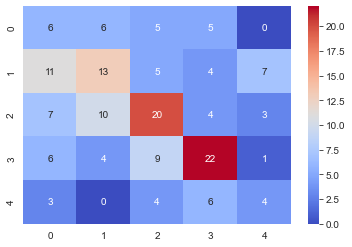

In [133]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, KNNmodel.predict(x_test))
TN = cm[1][1] # true negative
TP = cm[0][0] # true positive
FN = cm[0][1] # false negative
FP = cm[1][0] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')  

In [134]:
# find accuracy of KNN model on test data
# print accuracy metric 
print("KNN Test Accuracy: ", KNNmodel.score(x_test, y_test)* 100, "%")

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(KNNmodel, x_train, y_train, cv=10)
print("CrossValidation KNN train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(KNNmodel, x_test, y_test, cv=10)
print("CrossValidation KNN test average score: %.2f" % cv_scores.mean())

KNN Test Accuracy:  39.39393939393939 %
CrossValidation KNN train average score: 0.40
CrossValidation KNN test average score: 0.34


Overall KNN accuracy is poor.  Confusion matrix illustrate a good mix of predictions with no bias towards a single class.

In [135]:
# Random Forest import and define as model
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier()

# train the data using above Random Forest model
RFmodel.fit(x_train, y_train)

RandomForestClassifier()

<AxesSubplot:>

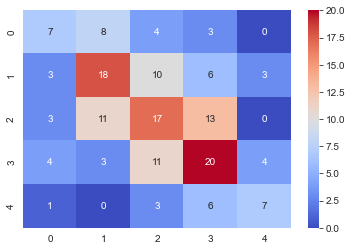

In [136]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, RFmodel.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [137]:
# find accuracy of RF model on test data
# print accuracy metric 
print("Random Test Forest Accuracy: ", RFmodel.score(x_test, y_test)* 100, "%")

# cross validation (10FOLD) training method and score
cv_scores = cross_val_score(RFmodel, x_train, y_train, cv=10)
print("CrossValidation RF train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(RFmodel, x_test, y_test, cv=10)
print("CrossValidation RF test average score: %.2f" % cv_scores.mean())

Random Test Forest Accuracy:  41.81818181818181 %
CrossValidation RF train average score: 0.41
CrossValidation RF test average score: 0.42


Random Forest overall accuracy is poor.  Confusion matrix illustrate a good mix of predictions with no bias towards a single class.

In [138]:
# Logistic Regression import and define as model
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
# train the data using above Logistic Regression model
LRmodel.fit(x_train, y_train)

LogisticRegression()

<AxesSubplot:>

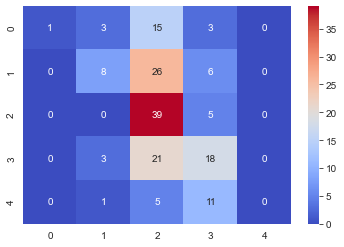

In [139]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, LRmodel.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')                   

In [140]:
# find accuracy of logistic regression model on test data
# print accuracy metric 
print("Logistic Regression Test Accuracy: ", LRmodel.score(x_test, y_test)* 100, "%")

# cross validation (10FOLD) training method and score
cv_scores = cross_val_score(LRmodel, x_train, y_train, cv=10)
print("CrossValidation LR train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(LRmodel, x_test, y_test, cv=10)
print("CrossValidation LR test average score: %.2f" % cv_scores.mean())

Logistic Regression Test Accuracy:  40.0 %
CrossValidation LR train average score: 0.32
CrossValidation LR test average score: 0.28


Logistic Regression overall accuracy is poor.  Confusion matrix illustrate a two classes having no predictions.  This algorithm will be eliminated from future model runs.

In [141]:
# Support Vector Classifier
from sklearn.svm import SVC
SVCmodel = SVC()
# train the data using above SVC model
SVCmodel.fit(x_train, y_train)

SVC()

<AxesSubplot:>

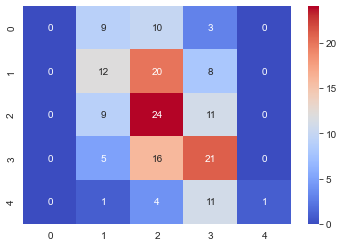

In [142]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, SVCmodel.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')         

In [143]:
# find accuracy of SVC model on test data
# print accuracy metric 
print("SVC Test Accuracy: ", SVCmodel.score(x_test, y_test)* 100, "%")

# cross validation (10FOLD) training method and score
cv_scores = cross_val_score(SVCmodel, x_train, y_train, cv=10)
print("CrossValidation SVC train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(SVCmodel, x_test, y_test, cv=10)
print("CrossValidation SVC test average score: %.2f" % cv_scores.mean())

SVC Test Accuracy:  35.15151515151515 %
CrossValidation SVC train average score: 0.35
CrossValidation SVC test average score: 0.37


SVC did not perform as well in this model iteration and was unable to predict some of the classes, but is a strongly recommended algorithm in sklearn's classificaton workflow cheatsheet.

A fair start to the model iteration, but class imbalance and input feature issues could be hindering the model output. KNN and Random Forest performed best.    

###  ASSESS INPUT FEATURES

Many of the model algorithms had trouble predicting class 1 and 5 and even the best predictors KNN and Random Forest far less predictions than classes 2, 3, and 4.  Class 5 will be combined with class 4 and class 1 with 2.  In essence, the distribution is now poor(2), fair(3), good(4) and a recognition that the accuracy of this prediction may not be ale to deal with the outliers.  Binning may take care of the outliers.

<AxesSubplot:xlabel='Binned_FZI_PS', ylabel='count'>

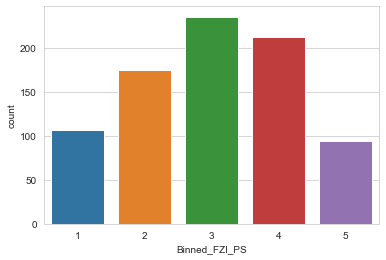

In [144]:
sns.set_style('whitegrid')
sns.countplot(x='Binned_FZI_PS', data=df)

<AxesSubplot:xlabel='Binned_FZI_PS', ylabel='count'>

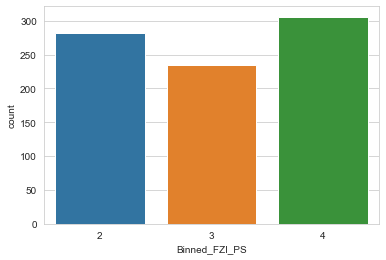

In [145]:
df['Binned_FZI_PS'] = df['Binned_FZI_PS'].replace([5],4)
df['Binned_FZI_PS'] = df['Binned_FZI_PS'].replace([1],2)
sns.set_style('whitegrid')
sns.countplot(x='Binned_FZI_PS', data=df)

There is fairly good balance now between the classes

In [146]:
# save wrangled file for future use
df.to_csv(r'C:\Users\14038\jupyter_projects\Manyberries_FZI\FZI_3BINS_wrangle.csv', index=False)

###  MODEL RUN #2

In [180]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
# separate input (y) and target (x) variables
x = df.drop(columns=['Binned_FZI_PS']) # input features
y = df['Binned_FZI_PS'] # target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [181]:
# rescale data using scaler that handles non gaussian and outlier better
# scale values using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))

In [182]:
x_train = minmax.fit_transform(x_train) # fit and transform
x_test = minmax.transform(x_test) # only transform the data

In [183]:
# KNN (K nearest neighbors) model import and define as model
KNNmodel2 = KNeighborsClassifier() 

# train the data using above KNN model
KNNmodel2.fit(x_train, y_train)

KNeighborsClassifier()

<AxesSubplot:>

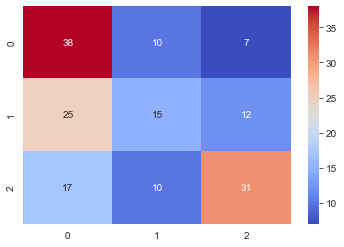

In [184]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, KNNmodel2.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [185]:
# find accuracy of KNN model on test data
# print accuracy metric 
print("KNN Test Accuracy: ", KNNmodel2.score(x_test, y_test)* 100, "%")

# cross validation (10FOLD) training method and score
cv_scores = cross_val_score(KNNmodel2, x_train, y_train, cv=10)
print("CrossValidation KNN train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(KNNmodel2, x_test, y_test, cv=10)
print("CrossValidation KNNtest average score: %.2f" % cv_scores.mean())

KNN Test Accuracy:  50.90909090909091 %
CrossValidation KNN train average score: 0.52
CrossValidation KNNtest average score: 0.47


Overall KNN accuracy is fair for both test and cross validated training scores.  Confusion matrix illustrate a good mix of predictions with not too much bias towards a single class prediction.

In [186]:
# Random Forest import and define as model
RFmodel2 = RandomForestClassifier()

# train the data using above Random Forest model
RFmodel2.fit(x_train, y_train)

RandomForestClassifier()

<AxesSubplot:>

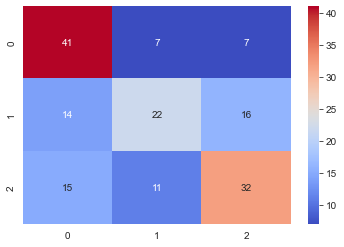

In [187]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, RFmodel2.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [188]:
# find accuracy of Random Forest model on test data
# print accuracy metric 
print("Random Test Forest Accuracy: ", RFmodel2.score(x_test, y_test)* 100, "%")

# cross validation training method and score SCORE
cv_scores = cross_val_score(RFmodel2, x_train, y_train, cv=10)
print("CrossValidation RF train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(RFmodel2, x_test, y_test, cv=10)
print("CrossValidation RF test average score: %.2f" % cv_scores.mean())

Random Test Forest Accuracy:  57.57575757575758 %
CrossValidation RF train average score: 0.58
CrossValidation RF test average score: 0.55


Random Forest overall training (10fold) and test accuracy is poor, but confusion matrix illustrate a good mix of predictions with no bias towards a single class.

In [189]:
# Support Vector Classifier
from sklearn.svm import SVC
SVCmodel2 = SVC()
# train the data using above SVC model
SVCmodel2.fit(x_train, y_train)

SVC()

<AxesSubplot:>

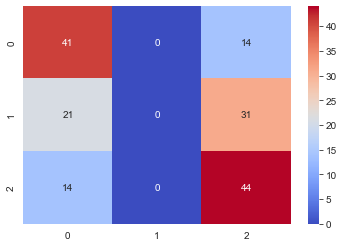

In [190]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, SVCmodel2.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')         

In [191]:
# find accuracy of SVC model on test data
# print accuracy metric 
print("SVC Test Accuracy: ", SVCmodel2.score(x_test, y_test)* 100, "%")

# cross validation (10FOLD) training method and score
cv_scores = cross_val_score(SVCmodel2, x_train, y_train, cv=10)
print("CrossValidation SVC train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(SVCmodel2, x_test, y_test, cv=10)
print("CrossValidation SVC test average score: %.2f" % cv_scores.mean())

SVC Test Accuracy:  51.515151515151516 %
CrossValidation SVC train average score: 0.55
CrossValidation SVC test average score: 0.48


SVC has similar results as KNN and RF.  Class prediction issues noted in model run 2 seem to have disappeared.  

Test-train splits were manually run numerous times to observe the changing in test and train scores.  There was a fair amount of variance (approx. 5%)in the scores with the two best performers (RF and KNN).  The cross validation train score average takes care of the issue of variance and is typically lower than the test accuracy scores (mid to high 50% for RF and KNN).

### MODEL RUN #3

Try different scaling technique to see effect on two best models.  Standard scaling selected

In [95]:
# feature scaling
# scale values using standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [96]:
x_train = sc.fit_transform(x_train) # fit and transform
x_test = sc.transform(x_test) # only transform the data

In [97]:
# KNN (K nearest neighbors) model import and define as model
KNNmodel3 = KNeighborsClassifier() 

# train the data using above KNN model
KNNmodel3.fit(x_train, y_train)

KNeighborsClassifier()

<AxesSubplot:>

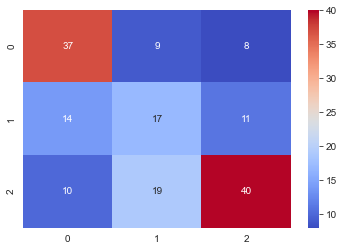

In [98]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, KNNmodel3.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [99]:
# find accuracy of KNN model on test data
# print accuracy metric 
print("KNN Test Accuracy: ", KNNmodel3.score(x_test, y_test)* 100, "%")

# cross validation (10FOLD) training method and score
cv_scores = cross_val_score(KNNmodel3, x_train, y_train, cv=10)
print("CrossValidation KNN train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(KNNmodel3, x_test, y_test, cv=10)
print("CrossValidation KNN test average score: %.2f" % cv_scores.mean())

KNN Test Accuracy:  56.96969696969697 %
CrossValidation KNN train average score: 0.57
CrossValidation KNN test average score: 0.55


KNN with standard scaling almost the same (slightly poorer) as the previous model.  Standard scaling does not improve the model and may have a very slight negative effect.

In [100]:
# Random Forest import and define as model
RFmodel3 = RandomForestClassifier()

# train the data using above Random Forest model
RFmodel3.fit(x_train, y_train)

RandomForestClassifier()

<AxesSubplot:>

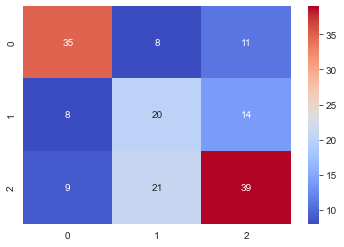

In [101]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, RFmodel3.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [102]:
# find accuracy of KNN model on test data
# print accuracy metric 
print("Random Test Forest Accuracy: ", RFmodel3.score(x_test, y_test)* 100, "%")

# cross validation (10FOLD) training method and score
cv_scores = cross_val_score(RFmodel3, x_train, y_train, cv=10)
print("CrossValidation RF train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(RFmodel3, x_test, y_test, cv=10)
print("CrossValidation RF test average score: %.2f" % cv_scores.mean())

Random Test Forest Accuracy:  56.96969696969697 %
CrossValidation RF train average score: 0.56
CrossValidation RF test average score: 0.54


In [103]:
# Support Vector Classifier
from sklearn.svm import SVC
SVCmodel3 = SVC()
# train the data using above SVC model
SVCmodel3.fit(x_train, y_train)

SVC()

<AxesSubplot:>

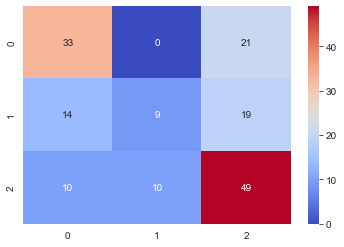

In [104]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, SVCmodel3.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')         

In [105]:
# find accuracy of SVC model on test data
# print accuracy metric 
print("SVC Test Accuracy: ", SVCmodel3.score(x_test, y_test)* 100, "%")

# cross validation (10FOLD) training method and score
cv_scores = cross_val_score(SVCmodel3, x_train, y_train, cv=10)
print("CrossValidation SVC train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(SVCmodel3, x_test, y_test, cv=10)
print("CrossValidation SVC test average score: %.2f" % cv_scores.mean())

SVC Test Accuracy:  55.15151515151515 %
CrossValidation SVC train average score: 0.56
CrossValidation SVC test average score: 0.58


Not much change in the accuracy scores from the previous version.  Standard scaling does not appear to improve the model.  

### REASSESS OUTLIERS

This model will deal with outliers.  The regression problem used two methods log transformation and reassigning values outside 3 standard deviations.  Log transformation was problematic due to the fact that SP yield some form of error (for log and sqrt).  In this instances, it was felt that removing data well outside distribution could help with the binned values classification.  The process is the exact same as in the regression version of this problem.  

In [66]:
# deal with outliers by assigning values outside 3std 
# NOTE: GR can not be <0
df['GR'] = np.where((df.GR < 0), 0, df.GR)
df['GR'] = np.where((df.GR > 119.903611), 119.903611, df.GR)


In [67]:
df['SP'] = np.where((df.SP < -156.305962), -156.305962, df.SP)
df['SP'] = np.where((df.SP > 83.989728), 83.989728, df.SP)

In [68]:
df['CALX'] = np.where((df.CALX < 165.856920), 165.856920, df.CALX)
df['CALX'] = np.where((df.CALX > 241.714878), 241.714878, df.CALX)

In [69]:
df['RHOB'] = np.where((df.RHOB < 2117.354981), 2117.354981, df.RHOB)
df['RHOB'] = np.where((df.RHOB > 2596.743609), 2596.743609, df.RHOB)

In [70]:
# ILD 
# NOTE:  RESISITIVTY OR ILD CAN NOT BE <0)
df['ILD'] = np.where((df.ILD < 0), 0, df.ILD)
df['ILD'] = np.where((df.ILD > 56.161307), 56.161307, df.ILD)

In [71]:
# CONFIRM CHANGES
df.describe()

,GR,SP,CALX,RHOB,NPSS,ILD,ILM,SFL,Binned_FZI_PS
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,56.168242,-36.158117,203.467963,2356.752384,0.284192,17.464969,18.812916,24.252770,3.029162
std,19.897905,40.049282,11.154582,76.571133,0.046944,10.967048,15.992650,30.484999,0.845267
min,16.650000,-108.420000,184.750000,2117.354981,0.090000,1.390000,1.530000,1.820000,2.000000
25%,42.455000,-63.160000,195.495000,2305.115000,0.260000,12.025000,12.145000,12.930000,2.000000
50%,53.470000,-44.950000,200.465000,2359.520000,0.280000,15.270000,15.710000,17.570000,3.000000
75%,66.700000,-19.700000,208.240000,2405.970000,0.310000,19.460000,19.820000,23.805000,4.000000
max,119.903611,82.700000,241.714878,2596.743609,0.530000,56.161307,167.790000,420.990000,4.000000


### MODEL 4

In [72]:
# Split the data for Training (_train) and Testing (_test)
# Train = 80%
# Test = 20%
# separate input (y) and target (x) variables
x = df.drop(columns=['Binned_FZI_PS']) # input features
y = df['Binned_FZI_PS'] # target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [73]:
# rescale data using scaler that handles non gaussian and outlier better
# scale values using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))

In [74]:
x_train = minmax.fit_transform(x_train) # fit and transform
x_test = minmax.transform(x_test) # only transform the data

In [75]:
# KNN (K nearest neighbors) model import and define as model
KNNmodel4 = KNeighborsClassifier() 

# train the data using above KNN model
KNNmodel4.fit(x_train, y_train)

KNeighborsClassifier()

<AxesSubplot:>

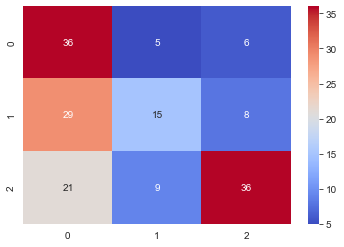

In [76]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, KNNmodel4.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [77]:
# find accuracy of KNN model on test data
# print accuracy metric 
print("KNN Test Accuracy: ", KNNmodel4.score(x_test, y_test)* 100, "%")

# cross validation (10FOLD) training method and score
cv_scores = cross_val_score(KNNmodel4, x_train, y_train, cv=10)
print("CrossValidation KNN train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(KNNmodel4, x_test, y_test, cv=10)
print("CrossValidation KNN test average score: %.2f" % cv_scores.mean())

KNN Test Accuracy:  52.72727272727272 %
CrossValidation KNN train average score: 0.54
CrossValidation KNN test average score: 0.53


In [78]:
# Random Forest import and define as model
RFmodel4 = RandomForestClassifier()

# train the data using above Random Forest model
RFmodel4.fit(x_train, y_train)

RandomForestClassifier()

<AxesSubplot:>

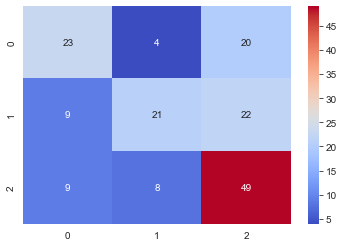

In [79]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, RFmodel2.predict(x_test))
TN = cm[0][0] # true negative
TP = cm[1][1] # true positive
FN = cm[1][0] # false negative
FP = cm[0][1] # false positive                      

#print confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')   

In [80]:
# find accuracy of Random Forest model on test data
# print accuracy metric 
print("Random Test Forest Accuracy: ", RFmodel4.score(x_test, y_test)* 100, "%")

# cross validation training method and score SCORE
cv_scores = cross_val_score(RFmodel4, x_train, y_train, cv=10)
print("CrossValidation RF train average score: %.2f" % cv_scores.mean())

# cross validation training method and score SCORE
cv_scores = cross_val_score(RFmodel4, x_test, y_test, cv=10)
print("CrossValidation RF test average score: %.2f" % cv_scores.mean())



Random Test Forest Accuracy:  55.15151515151515 %
CrossValidation RF train average score: 0.57
CrossValidation RF test average score: 0.57


The score of 55 to 58% and 10fold cross validation scores on training and test data were substantially lower.     The reassignment of outlier values may be useful, but at this point, the output is suspect and will require   

## RESULTS

The first iteration with MinMax scaling had poor performance with Random Forest Regressor and KNN.  Logistic Regression and Support Vector Classifier performance was very poor relative to RF and KNN. The second model iteration used the same scaling, but consolidated the classes from 5 to 3 by merging class 1 with 2 and 5 with 4.  This consolidation was based on the observation of some models having few to no predictions in those classes (see confusion matrix).  In addition, these two classes represented the imbalance in the target class and the merge created relative target balance (see Model #2).  In terms of test accuracy scores (total and true prediction rate), there was only a slight improvement, but cross validaton scores were meaningfully improved from mode1 to 2.  Model 3 used standard scaling instead of MinMax and saw no improvement.  Skewness is a problem for this dataset.  Binning helped remove some of those effects on the target, but many of the inputs were skewed with potential outlier data.  Model 4 attempted outlier value reaassignment using the same methodology as the regression notebook for this problem.  Scores were not meaningfully improved for either KNN and RF (see below).  Given the additional computation required to transform the data, model 4 was not selected at the best.  Evaluating solely based on the true positive and true negative predictions, the output is fair, but iterated the models yield a fair amount of variance in those accuracy scores.  Also, cross validation score metrics on the training (and test) the model is not as robust as a predictor.  Neither model is good enough to deploy, but Random Forest was slightly better on a fairly consistent basis.  

Should the model be deemed suitable enough for hyperparameter tuning at a later date, both files were saved (see below).



Model output changes with subsequent notebook runs, these results were noted at the time of writing.

    Model#2
    KNN Test Accuracy:  50.90909090909091 %
    CrossValidation KNN train average score: 0.52
    CrossValidation KNNtest average score: 0.47
    
    Model#4
    KNN Test Accuracy:  52.72727272727272 %
    CrossValidation KNN train average score: 0.54
    CrossValidation KNN test average score: 0.53

    Model#2 - BEST
    Random Test Forest Accuracy:  57.57575757575758 %
    CrossValidation RF train average score: 0.58
    CrossValidation RF test average score: 0.55

     Model#4
    Random Test Forest Accuracy:  55.15151515151515 %
    CrossValidation RF train average score: 0.57
    CrossValidation RF test average score: 0.57
  

In [192]:
import pickle
RFmodel2.fit(x_train, y_train)
# save the RF model to disk for future modelling
filename = 'RFmodel2_model_FZI_bin.sav'
pickle.dump(RFmodel2, open(filename, 'wb'))

In [193]:
KNNmodel2.fit(x_train, y_train)
# save the KNN model to disk for future modelling
filename = 'KNNmodel2_model_FZI_bin.sav'
pickle.dump(KNNmodel2, open(filename, 'wb'))

## CONCLUSIONS

An accuracy score of high 50% to low 60% is insufficient to deploy as a prediction model for the binned Flow Zone Indicator.  The bins were arbritrarily created initially and then portions merged twice to deal with problems of target imbalance because of difficulty predicting those classes for some model algorithms (e.g. Logistic Regression, SVC).  The error intrinsic to the inputs (wireline log data) and the target (core analysis) may be too large to get to accuracies >=90%, but given a set of closely related data and all quantifiable, the accuracy score of around +60% can be improved with some tweaks to the data and the model.  These tweaks are listed below in the recommendations section.  

This was the 2nd attempt at creating a prediction model for Flow Zone Indicator.  Both were done using supervised learning (regression and classification)and it is possible unsupervised learning may be more appropriate to characterize the data.  Cluster analysis might be a better way to rebin the data into more logical segments and provide a better target for model prediction.  The dataset is relatively small with only 823 rows and too small for deep learning or neural network where more complex relationships could possibly  resolved.  

Some of the missed predictions is likely due to issues with core analysis, namely permeability and porosity, the basis for FZI.  Some of these were noted in the other notebook for the regression model.  One not discussed prior is  selection bias for the individual samples.  Typically that individual only selects those parts of the rock that exhibit good porosity/permeability or have the integrity to be sampled and analyzed.  Also, the sample rate for the log vs the core is never the same.   Core is collected and the depth measurement for collection is independent to the wireline depth.  Great care is often taken to recalibrate the core back to the log, but the process if often more complex than a bulk depth shift due to variable core loss and expansion (i.e. pressure release) when the it is brought up to surface.

One other issue with respect to model and data is the relationship of porosity and permeability (the primary inputs to the FZI calculation) varies with different formations.  Some zones can have high porosity and low permeability (i.e. the connection between pore space) while others can have fair porosity and good permeability.  How the components of a rock arrange themselves depending on the rock type and what has happened to the rock since deposition.  FM_TOP is the reference to the various zones and a model run (not shown in this book) was made as part of the EDA, but removed when the output was quite poor.  In addition, there were two reasons why it was not included in this modelling:  

    1. There are several zones in the dataset and the count for each was greatly imbalanced to reflect any meaningful affect on the output.  In fact, the imbalanced could create bias.
    2.  It was unclear if the categorical to numeric classification should be ordinal or strictly numeric with no rank.  Some zones are clearly better than others, but should the other numeric inputs speak to that fact.

If the model was succesful, it would make a Geologist and Reservoir Engineer's more effective at their job and the advice they provide to their company.  The ability to quantify the reservoir's flow capacity is a fundamental aspect of oil and gas development.  If the accuracy could be improved, these models could form the basis for reservoir modelling and better plan the development of a pool.  It could also help identify bypassed pay (missed opportunities).  

A deployed model would need to be calibrated to actual production in order to be truly useful, but this would be a crucial first step using routinely collected, quantifiable data.  With a series of pool models in place they could be combined into a neural network to create a "grand" reservoir prediction solution to be used in regional oil and gas exploration. 

### RECOMMENDATIONS

1. Creating bins using unsupervised techniques such as kmeans or dbscan could be a better alternative for predicting FZI.  Using the input features to create the classes in the absence of a binned or calculated FZI value and then comparing to the labelled target data.
2. Calibration of reservoir quality and FZI could be improved by including production values as inputs to create the binned values first and then calibrate back to wireline logs might improve the model accuracy.  
3. Expand the dataset so it could be used on algorithms that typically work better with larger data sizes.
4. DT (sonic) is a useful input since it is used to calculate porosity, but in this case it was far too punitive to keep and remove the rows that had missing values.  If the dataset were to increase significantly, a separate model could be initiated using DT in the dataset.
5. Data transformations specific to each input were attempted (log transformation & outlier value reassignment), but there may be others that are more useful to help reduce the skewness/outlier affect.  In addition, the target is highly skewed and that could have a negative impact on the result.